important 変数を個々に定義する

In [1]:
SensorNum=3 # Sensor number
SampleNum=32 # Window Width
Overlap=0.5 # overlap
width=1000 # graph width 
EncodingDim=[4,8,12,16,32,64] # number of hidden layer note 
Axis='AccX,AccY,AccZ' # Axis
PathAxis='AccXYZ'

In [2]:
import numpy as np
import pandas as pd
from scipy import fftpack
from scipy import signal
import time
import os
import matplotlib.pyplot as plt
import pylab
import pickle
import copy

import processing
import window

import matplotlib.animation as animation
import datetime

%matplotlib inline

In [3]:
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adadelta
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils.visualize_util import model_to_dot, plot
from keras import backend as K
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping

import matplotlib.image as mpimg


Using Theano backend.
Using gpu device 0: GeForce GTX 970 (CNMeM is disabled, cuDNN 4007)


In [4]:
DataName='sensor'+str(SensorNum)+'_'+PathAxis
SensorName='sensor'+str(SensorNum)
DicName='MemSensor'+str(SensorNum)

In [5]:
WORKSPACE_PATH = '/home/takeyama/pywork/ipython/2016-07-18'

StudyDataPath=WORKSPACE_PATH+'/Study/'+DataName+'/'+'Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'/'
if not os.path.exists(StudyDataPath): os.makedirs(StudyDataPath)

GlaphDataPath=WORKSPACE_PATH+'/Graph/'+DataName+'/Learning-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'/'
if not os.path.exists(GlaphDataPath): os.makedirs(GlaphDataPath)

StudyDataModelPicPath=WORKSPACE_PATH+'/Study/'+DataName+'/modelPic-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'/'
if not os.path.exists(StudyDataModelPicPath): os.makedirs(StudyDataModelPicPath)

WindowDataPath=WORKSPACE_PATH+'/window/'
RawDataPath=WORKSPACE_PATH+'/raw/'

**Phase1 計測データの取得**

In [6]:
dic=processing.LoadDicDataFromFileNPZ(RawDataPath+DicName)

**Phase2 window flame 作成**

In [7]:
ArrayAxis = Axis.split(",")

In [8]:
ArrayAxis

['AccX', 'AccY', 'AccZ']

In [9]:
w=window.Window()
for a in ArrayAxis:
    w.SetData(a,dic[a])
wind=w.Compile(windowWidth=SampleNum,overlap=Overlap)
print wind.shape
windoW=wind.reshape((len(wind),np.prod(wind.shape[1:])))

AccX is registed now
AccY is registed now
AccZ is registed now
Build Complete
(254742, 3)
(7960, 32, 3)


In [10]:
windoW.shape

(7960, 96)

**前回やった学習をもう１度やってみる**

Train on 7960 samples, validate on 7960 samples
Epoch 1/50
7960/7960 [==============================] - 1s - loss: 0.0147 - val_loss: 0.0056
Epoch 2/50
7960/7960 [==============================] - 1s - loss: 0.0040 - val_loss: 0.0032
Epoch 3/50
7960/7960 [==============================] - 1s - loss: 0.0027 - val_loss: 0.0022
Epoch 4/50
7960/7960 [==============================] - 1s - loss: 0.0019 - val_loss: 0.0017
Epoch 5/50
7960/7960 [==============================] - 1s - loss: 0.0015 - val_loss: 0.0014
Epoch 6/50
7960/7960 [==============================] - 1s - loss: 0.0013 - val_loss: 0.0012
Epoch 7/50
7960/7960 [==============================] - 1s - loss: 0.0012 - val_loss: 0.0011
Epoch 8/50
7960/7960 [==============================] - 1s - loss: 0.0011 - val_loss: 0.0010
Epoch 9/50
7960/7960 [==============================] - 1s - loss: 9.9208e-04 - val_loss: 9.4732e-04
Epoch 10/50
7960/7960 [==============================] - 1s - loss: 9.1889e-04 - val_loss: 8.7815e-04
Epoch

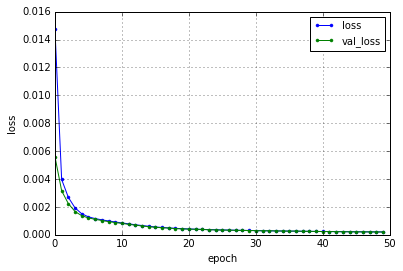

Train on 7960 samples, validate on 7960 samples
Epoch 1/50
7960/7960 [==============================] - 3s - loss: 0.0109 - val_loss: 0.0046
Epoch 2/50
7960/7960 [==============================] - 3s - loss: 0.0035 - val_loss: 0.0026
Epoch 3/50
7960/7960 [==============================] - 3s - loss: 0.0019 - val_loss: 0.0014
Epoch 4/50
7960/7960 [==============================] - 4s - loss: 0.0012 - val_loss: 0.0010
Epoch 5/50
7960/7960 [==============================] - 3s - loss: 9.5282e-04 - val_loss: 8.6383e-04
Epoch 6/50
7960/7960 [==============================] - 3s - loss: 8.0227e-04 - val_loss: 7.3197e-04
Epoch 7/50
7960/7960 [==============================] - 3s - loss: 6.7970e-04 - val_loss: 6.2341e-04
Epoch 8/50
7960/7960 [==============================] - 3s - loss: 5.8687e-04 - val_loss: 5.4362e-04
Epoch 9/50
7960/7960 [==============================] - 3s - loss: 5.2363e-04 - val_loss: 4.9317e-04
Epoch 10/50
7960/7960 [==============================] - 3s - loss: 4.7655e

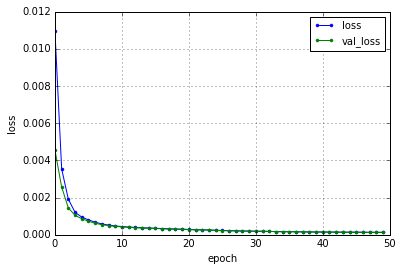

Train on 7960 samples, validate on 7960 samples
Epoch 1/50
7960/7960 [==============================] - 3s - loss: 0.0130 - val_loss: 0.0029
Epoch 2/50
7960/7960 [==============================] - 3s - loss: 0.0019 - val_loss: 0.0012
Epoch 3/50
7960/7960 [==============================] - 4s - loss: 9.5234e-04 - val_loss: 7.8829e-04
Epoch 4/50
7960/7960 [==============================] - 3s - loss: 7.2170e-04 - val_loss: 6.6056e-04
Epoch 5/50
7960/7960 [==============================] - 3s - loss: 5.9608e-04 - val_loss: 5.4436e-04
Epoch 6/50
7960/7960 [==============================] - 4s - loss: 5.0912e-04 - val_loss: 4.6783e-04
Epoch 7/50
7960/7960 [==============================] - 3s - loss: 4.4065e-04 - val_loss: 4.1443e-04
Epoch 8/50
7960/7960 [==============================] - 3s - loss: 3.9263e-04 - val_loss: 3.7456e-04
Epoch 9/50
7960/7960 [==============================] - 3s - loss: 3.5402e-04 - val_loss: 3.3628e-04
Epoch 10/50
7960/7960 [==============================] - 3s

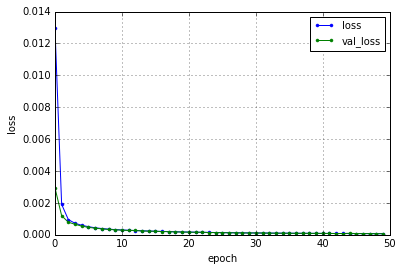

Train on 7960 samples, validate on 7960 samples
Epoch 1/50
7960/7960 [==============================] - 3s - loss: 0.0076 - val_loss: 0.0023
Epoch 2/50
7960/7960 [==============================] - 3s - loss: 0.0015 - val_loss: 0.0011
Epoch 3/50
7960/7960 [==============================] - 3s - loss: 9.2454e-04 - val_loss: 7.9736e-04
Epoch 4/50
7960/7960 [==============================] - 3s - loss: 7.0443e-04 - val_loss: 6.0910e-04
Epoch 5/50
7960/7960 [==============================] - 3s - loss: 5.4402e-04 - val_loss: 4.8058e-04
Epoch 6/50
7960/7960 [==============================] - 3s - loss: 4.3069e-04 - val_loss: 3.8568e-04
Epoch 7/50
7960/7960 [==============================] - 3s - loss: 3.5567e-04 - val_loss: 3.2600e-04
Epoch 8/50
7960/7960 [==============================] - 3s - loss: 3.0890e-04 - val_loss: 2.8809e-04
Epoch 9/50
7960/7960 [==============================] - 4s - loss: 2.7524e-04 - val_loss: 2.6248e-04
Epoch 10/50
7960/7960 [==============================] - 4s

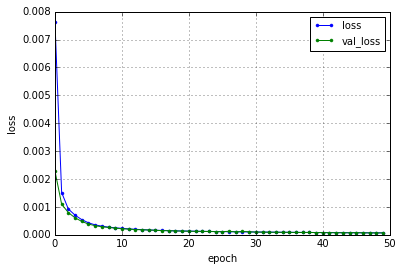

Train on 7960 samples, validate on 7960 samples
Epoch 1/50
7960/7960 [==============================] - 4s - loss: 0.0051 - val_loss: 9.8778e-04
Epoch 2/50
7960/7960 [==============================] - 3s - loss: 6.7845e-04 - val_loss: 4.9710e-04
Epoch 3/50
7960/7960 [==============================] - 4s - loss: 4.0649e-04 - val_loss: 3.4371e-04
Epoch 4/50
7960/7960 [==============================] - 4s - loss: 2.8714e-04 - val_loss: 2.4923e-04
Epoch 5/50
7960/7960 [==============================] - 4s - loss: 2.2616e-04 - val_loss: 2.0049e-04
Epoch 6/50
7960/7960 [==============================] - 3s - loss: 1.8810e-04 - val_loss: 1.7203e-04
Epoch 7/50
7960/7960 [==============================] - 3s - loss: 1.6262e-04 - val_loss: 1.4888e-04
Epoch 8/50
7960/7960 [==============================] - 3s - loss: 1.4283e-04 - val_loss: 1.3209e-04
Epoch 9/50
7960/7960 [==============================] - 3s - loss: 1.2855e-04 - val_loss: 1.2484e-04
Epoch 10/50
7960/7960 [========================

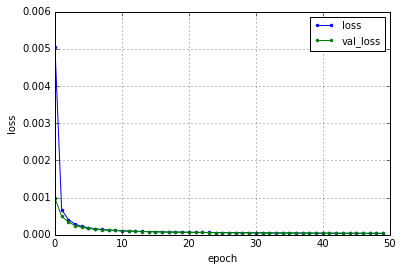

Train on 7960 samples, validate on 7960 samples
Epoch 1/50
7960/7960 [==============================] - 4s - loss: 0.0026 - val_loss: 4.7795e-04
Epoch 2/50
7960/7960 [==============================] - 3s - loss: 3.5980e-04 - val_loss: 2.7620e-04
Epoch 3/50
7960/7960 [==============================] - 3s - loss: 2.4004e-04 - val_loss: 2.0653e-04
Epoch 4/50
7960/7960 [==============================] - 3s - loss: 1.8685e-04 - val_loss: 1.6282e-04
Epoch 5/50
7960/7960 [==============================] - 3s - loss: 1.5014e-04 - val_loss: 1.3431e-04
Epoch 6/50
7960/7960 [==============================] - 4s - loss: 1.2668e-04 - val_loss: 1.1785e-04
Epoch 7/50
7960/7960 [==============================] - 4s - loss: 1.0898e-04 - val_loss: 1.0469e-04
Epoch 8/50
7960/7960 [==============================] - 3s - loss: 9.6311e-05 - val_loss: 9.1322e-05
Epoch 9/50
7960/7960 [==============================] - 3s - loss: 8.5931e-05 - val_loss: 8.0367e-05
Epoch 10/50
7960/7960 [========================

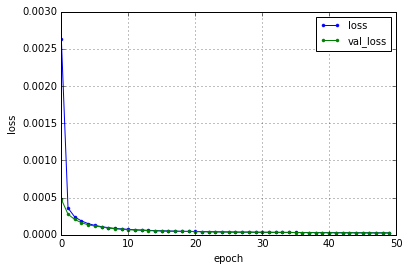

Train on 7960 samples, validate on 7960 samples
Epoch 1/50
7960/7960 [==============================] - 3s - loss: 0.2198 - val_loss: 0.0242
Epoch 2/50
7960/7960 [==============================] - 3s - loss: 0.0188 - val_loss: 0.0152
Epoch 3/50
7960/7960 [==============================] - 3s - loss: 0.0121 - val_loss: 0.0100
Epoch 4/50
7960/7960 [==============================] - 4s - loss: 0.0087 - val_loss: 0.0076
Epoch 5/50
7960/7960 [==============================] - 4s - loss: 0.0071 - val_loss: 0.0065
Epoch 6/50
7960/7960 [==============================] - 3s - loss: 0.0062 - val_loss: 0.0060
Epoch 7/50
7960/7960 [==============================] - 3s - loss: 0.0055 - val_loss: 0.0053
Epoch 8/50
7960/7960 [==============================] - 3s - loss: 0.0049 - val_loss: 0.0046
Epoch 9/50
7960/7960 [==============================] - 3s - loss: 0.0043 - val_loss: 0.0039
Epoch 10/50
7960/7960 [==============================] - 4s - loss: 0.0037 - val_loss: 0.0036
Epoch 11/50
7960/7960

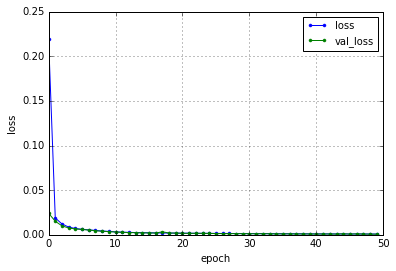

Train on 7960 samples, validate on 7960 samples
Epoch 1/50
7960/7960 [==============================] - 3s - loss: 0.1244 - val_loss: 0.0151
Epoch 2/50
7960/7960 [==============================] - 3s - loss: 0.0110 - val_loss: 0.0079
Epoch 3/50
7960/7960 [==============================] - 3s - loss: 0.0065 - val_loss: 0.0053
Epoch 4/50
7960/7960 [==============================] - 3s - loss: 0.0048 - val_loss: 0.0041
Epoch 5/50
7960/7960 [==============================] - 3s - loss: 0.0037 - val_loss: 0.0032
Epoch 6/50
7960/7960 [==============================] - 3s - loss: 0.0029 - val_loss: 0.0028
Epoch 7/50
7960/7960 [==============================] - 4s - loss: 0.0024 - val_loss: 0.0021
Epoch 8/50
7960/7960 [==============================] - 3s - loss: 0.0021 - val_loss: 0.0018
Epoch 9/50
7960/7960 [==============================] - 3s - loss: 0.0018 - val_loss: 0.0017
Epoch 10/50
7960/7960 [==============================] - 3s - loss: 0.0017 - val_loss: 0.0015
Epoch 11/50
7960/7960

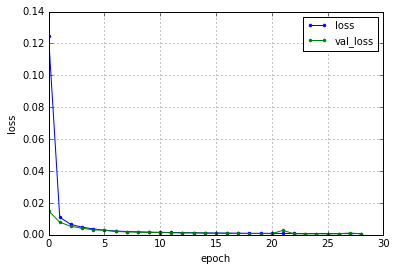

Train on 7960 samples, validate on 7960 samples
Epoch 1/50
7960/7960 [==============================] - 3s - loss: 0.1249 - val_loss: 0.0149
Epoch 2/50
7960/7960 [==============================] - 4s - loss: 0.0106 - val_loss: 0.0077
Epoch 3/50
7960/7960 [==============================] - 3s - loss: 0.0061 - val_loss: 0.0049
Epoch 4/50
7960/7960 [==============================] - 4s - loss: 0.0042 - val_loss: 0.0034
Epoch 5/50
7960/7960 [==============================] - 3s - loss: 0.0030 - val_loss: 0.0027
Epoch 6/50
7960/7960 [==============================] - 3s - loss: 0.0023 - val_loss: 0.0021
Epoch 7/50
7960/7960 [==============================] - 3s - loss: 0.0020 - val_loss: 0.0017
Epoch 8/50
7960/7960 [==============================] - 3s - loss: 0.0017 - val_loss: 0.0015
Epoch 9/50
7960/7960 [==============================] - 3s - loss: 0.0015 - val_loss: 0.0014
Epoch 10/50
7960/7960 [==============================] - 3s - loss: 0.0014 - val_loss: 0.0013
Epoch 11/50
7960/7960

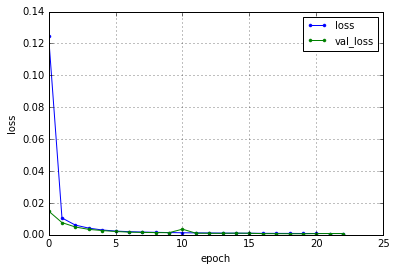

Train on 7960 samples, validate on 7960 samples
Epoch 1/50
7960/7960 [==============================] - 4s - loss: 0.1021 - val_loss: 0.0094
Epoch 2/50
7960/7960 [==============================] - 3s - loss: 0.0063 - val_loss: 0.0041
Epoch 3/50
7960/7960 [==============================] - 3s - loss: 0.0033 - val_loss: 0.0027
Epoch 4/50
7960/7960 [==============================] - 3s - loss: 0.0022 - val_loss: 0.0018
Epoch 5/50
7960/7960 [==============================] - 3s - loss: 0.0019 - val_loss: 0.0018
Epoch 6/50
7960/7960 [==============================] - 3s - loss: 0.0017 - val_loss: 0.0014
Epoch 7/50
7960/7960 [==============================] - 4s - loss: 0.0015 - val_loss: 0.0016
Epoch 8/50
7960/7960 [==============================] - 3s - loss: 0.0014 - val_loss: 0.0012
Epoch 9/50
7960/7960 [==============================] - 3s - loss: 0.0013 - val_loss: 0.0011
Epoch 10/50
7960/7960 [==============================] - 3s - loss: 0.0012 - val_loss: 9.7377e-04
Epoch 11/50
7960/

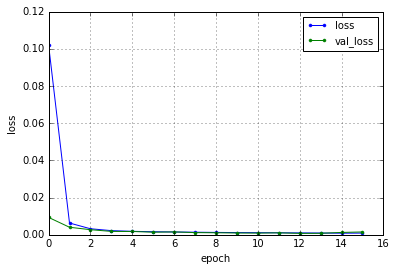

Train on 7960 samples, validate on 7960 samples
Epoch 1/50
7960/7960 [==============================] - 3s - loss: 0.0538 - val_loss: 0.0054
Epoch 2/50
7960/7960 [==============================] - 3s - loss: 0.0033 - val_loss: 0.0020
Epoch 3/50
7960/7960 [==============================] - 3s - loss: 0.0018 - val_loss: 0.0014
Epoch 4/50
7960/7960 [==============================] - 3s - loss: 0.0014 - val_loss: 0.0011
Epoch 5/50
7960/7960 [==============================] - 3s - loss: 0.0012 - val_loss: 0.0012
Epoch 6/50
7960/7960 [==============================] - 3s - loss: 0.0011 - val_loss: 8.8832e-04
Epoch 7/50
7960/7960 [==============================] - 3s - loss: 0.0010 - val_loss: 7.1287e-04
Epoch 8/50
7960/7960 [==============================] - 3s - loss: 9.5673e-04 - val_loss: 8.5099e-04
Epoch 9/50
7960/7960 [==============================] - 3s - loss: 9.6316e-04 - val_loss: 6.2714e-04
Epoch 10/50
7960/7960 [==============================] - 3s - loss: 8.8077e-04 - val_loss: 

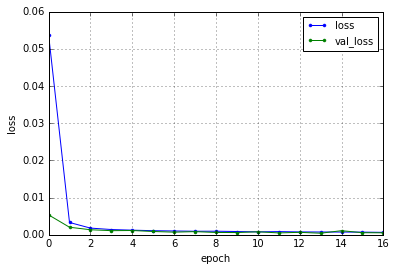

Train on 7960 samples, validate on 7960 samples
Epoch 1/50
7960/7960 [==============================] - 4s - loss: 0.0386 - val_loss: 0.0025
Epoch 2/50
7960/7960 [==============================] - 3s - loss: 0.0018 - val_loss: 0.0012
Epoch 3/50
7960/7960 [==============================] - 3s - loss: 0.0013 - val_loss: 8.2470e-04
Epoch 4/50
7960/7960 [==============================] - 3s - loss: 0.0010 - val_loss: 0.0015
Epoch 5/50
7960/7960 [==============================] - 3s - loss: 9.7780e-04 - val_loss: 6.2721e-04
Epoch 6/50
7960/7960 [==============================] - 3s - loss: 8.8586e-04 - val_loss: 6.1794e-04
Epoch 7/50
7960/7960 [==============================] - 3s - loss: 7.9227e-04 - val_loss: 4.7215e-04
Epoch 8/50
7960/7960 [==============================] - 3s - loss: 8.9796e-04 - val_loss: 0.0024
Epoch 9/50
7960/7960 [==============================] - 3s - loss: 8.0499e-04 - val_loss: 5.8515e-04
Epoch 10/50
7960/7960 [==============================] - 4s - loss: 7.2548e

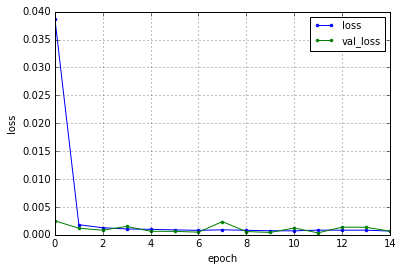

Train on 7960 samples, validate on 7960 samples
Epoch 1/50
7960/7960 [==============================] - 3s - loss: 0.0675 - val_loss: 0.0407
Epoch 2/50
7960/7960 [==============================] - 3s - loss: 0.0340 - val_loss: 0.0300
Epoch 3/50
7960/7960 [==============================] - 3s - loss: 0.0276 - val_loss: 0.0256
Epoch 4/50
7960/7960 [==============================] - 3s - loss: 0.0240 - val_loss: 0.0225
Epoch 5/50
7960/7960 [==============================] - 3s - loss: 0.0213 - val_loss: 0.0201
Epoch 6/50
7960/7960 [==============================] - 3s - loss: 0.0190 - val_loss: 0.0180
Epoch 7/50
7960/7960 [==============================] - 3s - loss: 0.0171 - val_loss: 0.0162
Epoch 8/50
7960/7960 [==============================] - 4s - loss: 0.0155 - val_loss: 0.0147
Epoch 9/50
7960/7960 [==============================] - 3s - loss: 0.0141 - val_loss: 0.0135
Epoch 10/50
7960/7960 [==============================] - 3s - loss: 0.0131 - val_loss: 0.0126
Epoch 11/50
7960/7960

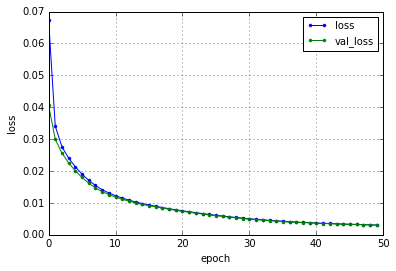

Train on 7960 samples, validate on 7960 samples
Epoch 1/50
7960/7960 [==============================] - 3s - loss: 0.0470 - val_loss: 0.0284
Epoch 2/50
7960/7960 [==============================] - 3s - loss: 0.0233 - val_loss: 0.0196
Epoch 3/50
7960/7960 [==============================] - 3s - loss: 0.0170 - val_loss: 0.0148
Epoch 4/50
7960/7960 [==============================] - 3s - loss: 0.0133 - val_loss: 0.0118
Epoch 5/50
7960/7960 [==============================] - 3s - loss: 0.0109 - val_loss: 0.0099
Epoch 6/50
7960/7960 [==============================] - 3s - loss: 0.0093 - val_loss: 0.0087
Epoch 7/50
7960/7960 [==============================] - 3s - loss: 0.0081 - val_loss: 0.0076
Epoch 8/50
7960/7960 [==============================] - 3s - loss: 0.0073 - val_loss: 0.0068
Epoch 9/50
7960/7960 [==============================] - 3s - loss: 0.0066 - val_loss: 0.0062
Epoch 10/50
7960/7960 [==============================] - 3s - loss: 0.0059 - val_loss: 0.0057
Epoch 11/50
7960/7960

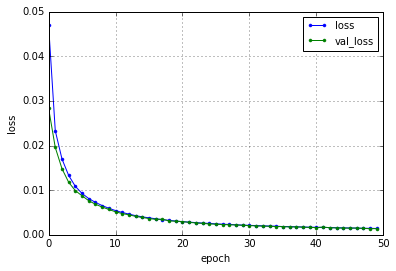

Train on 7960 samples, validate on 7960 samples
Epoch 1/50
7960/7960 [==============================] - 3s - loss: 0.0479 - val_loss: 0.0262
Epoch 2/50
7960/7960 [==============================] - 3s - loss: 0.0205 - val_loss: 0.0163
Epoch 3/50
7960/7960 [==============================] - 4s - loss: 0.0135 - val_loss: 0.0114
Epoch 4/50
7960/7960 [==============================] - 4s - loss: 0.0100 - val_loss: 0.0088
Epoch 5/50
7960/7960 [==============================] - 4s - loss: 0.0080 - val_loss: 0.0073
Epoch 6/50
7960/7960 [==============================] - 4s - loss: 0.0067 - val_loss: 0.0061
Epoch 7/50
7960/7960 [==============================] - 4s - loss: 0.0057 - val_loss: 0.0053
Epoch 8/50
7960/7960 [==============================] - 4s - loss: 0.0050 - val_loss: 0.0046
Epoch 9/50
7960/7960 [==============================] - 4s - loss: 0.0044 - val_loss: 0.0041
Epoch 10/50
7960/7960 [==============================] - 4s - loss: 0.0039 - val_loss: 0.0037
Epoch 11/50
7960/7960

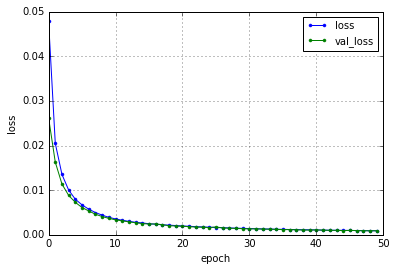

Train on 7960 samples, validate on 7960 samples
Epoch 1/50
7960/7960 [==============================] - 3s - loss: 0.0530 - val_loss: 0.0216
Epoch 2/50
7960/7960 [==============================] - 3s - loss: 0.0159 - val_loss: 0.0122
Epoch 3/50
7960/7960 [==============================] - 3s - loss: 0.0105 - val_loss: 0.0091
Epoch 4/50
7960/7960 [==============================] - 3s - loss: 0.0082 - val_loss: 0.0074
Epoch 5/50
7960/7960 [==============================] - 3s - loss: 0.0067 - val_loss: 0.0060
Epoch 6/50
7960/7960 [==============================] - 3s - loss: 0.0056 - val_loss: 0.0051
Epoch 7/50
7960/7960 [==============================] - 3s - loss: 0.0047 - val_loss: 0.0043
Epoch 8/50
7960/7960 [==============================] - 3s - loss: 0.0040 - val_loss: 0.0038
Epoch 9/50
7960/7960 [==============================] - 3s - loss: 0.0036 - val_loss: 0.0033
Epoch 10/50
7960/7960 [==============================] - 3s - loss: 0.0032 - val_loss: 0.0031
Epoch 11/50
7960/7960

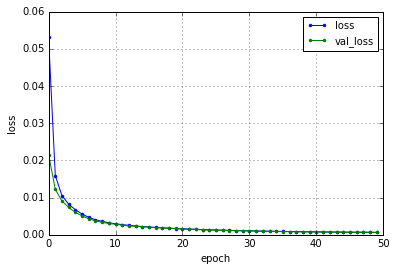

Train on 7960 samples, validate on 7960 samples
Epoch 1/50
7960/7960 [==============================] - 3s - loss: 0.0362 - val_loss: 0.0130
Epoch 2/50
7960/7960 [==============================] - 3s - loss: 0.0088 - val_loss: 0.0064
Epoch 3/50
7960/7960 [==============================] - 3s - loss: 0.0054 - val_loss: 0.0044
Epoch 4/50
7960/7960 [==============================] - 3s - loss: 0.0038 - val_loss: 0.0033
Epoch 5/50
7960/7960 [==============================] - 3s - loss: 0.0030 - val_loss: 0.0026
Epoch 6/50
7960/7960 [==============================] - 3s - loss: 0.0024 - val_loss: 0.0022
Epoch 7/50
7960/7960 [==============================] - 4s - loss: 0.0021 - val_loss: 0.0019
Epoch 8/50
7960/7960 [==============================] - 3s - loss: 0.0018 - val_loss: 0.0016
Epoch 9/50
7960/7960 [==============================] - 4s - loss: 0.0016 - val_loss: 0.0015
Epoch 10/50
7960/7960 [==============================] - 3s - loss: 0.0014 - val_loss: 0.0013
Epoch 11/50
7960/7960

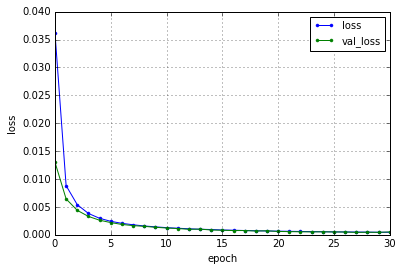

Train on 7960 samples, validate on 7960 samples
Epoch 1/50
7960/7960 [==============================] - 3s - loss: 0.0178 - val_loss: 0.0063
Epoch 2/50
7960/7960 [==============================] - 3s - loss: 0.0045 - val_loss: 0.0032
Epoch 3/50
7960/7960 [==============================] - 3s - loss: 0.0028 - val_loss: 0.0022
Epoch 4/50
7960/7960 [==============================] - 3s - loss: 0.0020 - val_loss: 0.0017
Epoch 5/50
7960/7960 [==============================] - 3s - loss: 0.0016 - val_loss: 0.0015
Epoch 6/50
7960/7960 [==============================] - 3s - loss: 0.0013 - val_loss: 0.0012
Epoch 7/50
7960/7960 [==============================] - 3s - loss: 0.0011 - val_loss: 9.5930e-04
Epoch 8/50
7960/7960 [==============================] - 3s - loss: 9.5542e-04 - val_loss: 8.4160e-04
Epoch 9/50
7960/7960 [==============================] - 3s - loss: 8.3474e-04 - val_loss: 7.9298e-04
Epoch 10/50
7960/7960 [==============================] - 3s - loss: 7.3700e-04 - val_loss: 6.90

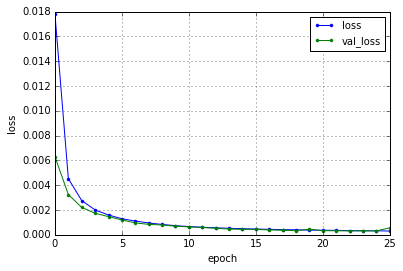

In [11]:
for AxisName,WindowNum in zip(ArrayAxis,range(3)):
    for encoding_dim in EncodingDim:
        # define SaveFileName
        commonLabel='_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+AxisName
        SaveFileNameEncord=DataName+'_encoded'+commonLabel
        SaveFileNameDecord=DataName+'_decoded'+commonLabel
        SaveFileNameNet=DataName+'_net'+commonLabel
        SaveFileNameTrain=DataName+'_train'+commonLabel
        SaveFileNameTest=DataName+'_test'+commonLabel
        SaveFileNameGlaph=GlaphDataPath+DataName+commonLabel+'_loss_val_loss.png'

        window_test=wind[:,:,WindowNum]
        window_train=wind[:,:,WindowNum]
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTrain,window_test)
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTest,window_test)
        shapeNum=wind.shape[1]

        # this is our input placeholder
        input_img = Input(shape=(shapeNum,))
        # "encoded" is the encoded representation of the input
        encoded = Dense(encoding_dim, activation='tanh')(input_img)
        # "decoded" is the lossy reconstruction of the input
        decoded = Dense(shapeNum, activation='linear')(encoded)

        # this model maps an input to its reconstruction
        autoencoder = Model(input=input_img, output=decoded)

        # this model maps an input to its encoded representation
        encoder = Model(input=input_img, output=encoded)

        # create a placeholder for an encoded (32-dimensional) input
        encoded_input = Input(shape=(encoding_dim,))
        # retrieve the last layer of the autoencoder model
        decoder_layer = autoencoder.layers[-1]
        # create the decoder model
        decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

        autoencoder.compile(optimizer='adadelta', loss='mse')
        plot(autoencoder,  to_file=StudyDataModelPicPath+SaveFileNameNet+'.png')

        early_stopping = EarlyStopping(monitor='val_loss', patience=2)
        hist = autoencoder.fit(window_train, window_train,
                        nb_epoch=50,
                        batch_size=shapeNum/4,
                        shuffle=True,
                        validation_data=(window_test, window_test),
                        callbacks=[early_stopping])

        encoded_imgs = encoder.predict(window_test)
        decoded_imgs = decoder.predict(encoded_imgs)

        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameEncord,encoded_imgs)
        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameDecord,decoded_imgs)

        # save model and wights
        json_string = encoder.to_json()
        open(StudyDataPath+SaveFileNameEncord+'.json', 'w').write(json_string)
        encoder.save_weights(StudyDataPath+SaveFileNameEncord+'_weights.h5')

        json_string = decoder.to_json()
        open(StudyDataPath+SaveFileNameDecord+'.json', 'w').write(json_string)
        decoder.save_weights(StudyDataPath+SaveFileNameDecord+'_weights.h5')

        json_string = autoencoder.to_json()
        open(StudyDataPath+SaveFileNameNet+'.json', 'w').write(json_string)
        autoencoder.save_weights(StudyDataPath+SaveFileNameNet+'_weights.h5')

        # plot loss
        loss = hist.history['loss']
        val_loss = hist.history['val_loss']

        nb_epoch = len(loss)
        plt.plot(range(nb_epoch), loss, marker='.', label='loss')
        plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
        plt.legend(loc='best', fontsize=10)
        plt.grid()
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.savefig(SaveFileNameGlaph)
        plt.show()